Adapted from [this tutorial](https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/).

In [ ]:
#Run this cell to be able to access required data
#Follow the instructions displayed in the output

from google.colab import auth
from googleapiclient.discovery import build
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Introduction
Face detection is a computer vision problem that involves finding faces in photos. It is a trivial problem for humans to solve and has been solved reasonably well by classical feature-based techniques, such as the cascade classifier (see below). More recently deep learning methods have achieved state-of-the-art results on standard benchmark face detection datasets. One example is the Multi-task Cascade Convolutional Neural Network, or MTCNN for short.

<img src="http://kpzhang93.github.io/SPL/stylesheets/image007.png" width="500">

In this assignment, you will discover how to perform face detection in Python using classical and deep learning models.

The two main approaches to face recognition: 


1.   Feature-based: use hand-crafted filters to search for and detect faces
2.   Deep learning: learn holistically how to extract faces from the entire image





# Part 1) Feature-based Cascaded Classifier
Feature-based face detection algorithms are fast and effective and have been used successfully for decades. Perhaps the most successful example is a technique called cascade classifiers first described by Paul Viola and Michael Jones and their 2001 paper titled “Rapid Object Detection using a Boosted Cascade of Simple Features.”

In the paper, the AdaBoost model is used to learn a range of very simple or weak features in each face, that together provide a robust classifier. The models are then organized into a hierarchy of increasing complexity, called a “cascade”. Simpler classifiers operate on candidate face regions directly, acting like a coarse filter, whereas complex classifiers operate only on those candidate regions that show the most promise as faces.

We are going to use a modern implementation of the Classifier Cascade face detection algorithm as provided in the OpenCV library. The benefit of this implementation is that it provides pre-trained face detection models, and provides an interface to train a model on your own dataset.

## Load test images and pre-trained models
Run the below cell to download some test images and the pre-trainined models. Add your own test image by pasting a link to `image_3_url`. Find an image with frontal faces of a group of people that you think will be difficult for the classifier. 

In [ ]:
import urllib.request
model1_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
urllib.request.urlretrieve(model1_url, "haarcascade_frontalface_default.xml")
model2_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml"
urllib.request.urlretrieve(model2_url, "haarcascade_eye.xml")
image1_url = "https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F6052170a9df9bdf69d63f201%2F0x0.jpg"
urllib.request.urlretrieve(image1_url, "test_1.jpg")
image2_url = "https://pbs.twimg.com/media/BhxWutnCEAAtEQ6.jpg"
urllib.request.urlretrieve(image2_url, "test_2.jpg")
image3_url = "https://bowwowinsurance.com.au/wp-content/uploads/2018/10/happy-family-with-their-beautiful-golden-retriever-lying-in-grass-700x700.jpg"
urllib.request.urlretrieve(image3_url, "test_3.jpg")

('test_3.jpg', <http.client.HTTPMessage at 0x7f1f86b08110>)

I went with an image that has a dog included to see how the model will do. I am specifically curious to see if the dog gets included in the face detection algorithm alongside the three other humans.

## Q1) Face detection (3)
Load the face detection model ("haarcascade_frontalface_default.xml") and run it on the three test images. 
**Hint: see [documentation](https://docs.opencv.org/4.5.3/d9/d80/classcv_1_1cuda_1_1CascadeClassifier.html) or [tutorial](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html)**



1.   Plot the overlayed bounding boxes of the detections for each image
2.   For "test_2.jpg" adjust the parameters `minNeighbors` and `scaleFactor`. Describe what the parameters control and how they affect the face detection. Give a set of parameters that improve the detection over the default values.
3. Comment on the performance of the detector on the image you selected for "test_3.jpg". Describe the failure points of the detector. Apply the same parameters you selected in *Q1.2)*.  Does it improve the performance?




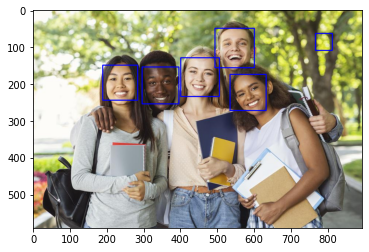

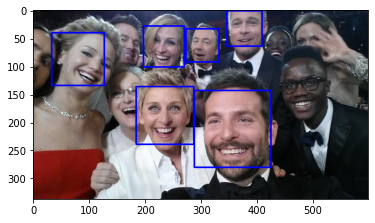

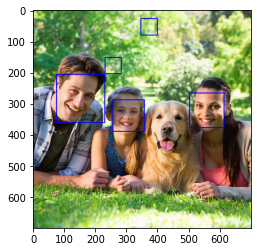

In [ ]:
#Function to load classifier
import cv2
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
#Solution here:

# Prepare the classifier.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Prepare the images (need to be greyscaled) and detect faces
images = [cv2.imread('test_1.jpg'), cv2.imread('test_2.jpg'), 
          cv2.imread('test_3.jpg')]
for index, image in enumerate(images):
  grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Look for faces 
  # Using default values by not explicitly specifying values for other params
  faces = face_cascade.detectMultiScale(grey)
  for (x, y, w, h) in faces:
    img = cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

  """Plot the detected faces 
  Plot seems to imply having axes present, but the tutorial linked doesn't
  do that for this classifier. To have the axes one would need to use 
  pyplot.imshow(img) followed by pyplot.show().
  You'd also need to convert the colours back to normal first.

  To the TA, if you don't want to see the axes, please uncomment the 
  cv2_imshow(img) line and comment out the next three lines. You'll 
  also need to do this for the next two code blocks.
  
  I just didn't know which was expected so I'm including both methods. 
  """
  # We need to use cv2_imshow instead of cv.imshow to avoid crashing colab.
  #cv2_imshow(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
  pyplot.imshow(img)
  pyplot.show()


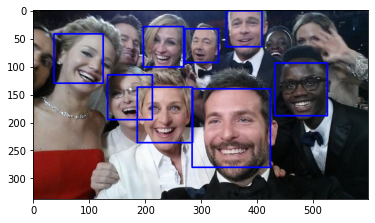

In [ ]:
# Parameter adjustment for Q1.2)
image_2 = cv2.imread('test_2.jpg')
grey = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
# Look for faces (parameter values manually adjusted)
faces = face_cascade.detectMultiScale(grey, 1.05, 3)
for (x, y, w, h) in faces:
  img = cv2.rectangle(image_2, (x, y), (x + w, y + h), (255, 0, 0), 2)
#cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
pyplot.imshow(img)
pyplot.show()


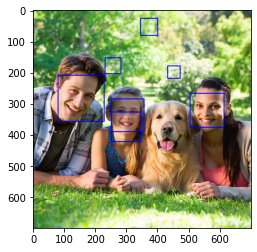

In [ ]:
# Application of adjusted parameters for Q1.3)
image_3 = cv2.imread('test_3.jpg')
grey = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)
# Look for faces (parameter values manually adjusted)
faces = face_cascade.detectMultiScale(grey, 1.05, 3)
for (x, y, w, h) in faces:
  img = cv2.rectangle(image_3, (x, y), (x + w, y + h), (255, 0, 0), 2)
#cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
pyplot.imshow(img)
pyplot.show()


*Discussion here:*

*Q1.2)*

Taken directly from the documentation, "`minNeighbors` is a parameter that specifies how many neighbors each candidate rectangle should have to retain in it." and "`scaleFactor` is a parameter specifiying how much the image size is reduced at each image scale".

<br/>

In other words:

 - `minNeighbors` is specifically dealing with the quality of the detected faces. Increasing it results in fewer detections, but the detections are of a higher quality and more likely to be actually be correctly detected faces. Neighbors in this context seems to refer to how many neighboring values are determined to be apart of the detected region. A higher minimum would increase the number of neighbors needed to be sure the detection is valid, which would correlate into a better quality detection.

 - `scaleFactor` will rescale the image for each step. It seems the steps are taken during analysis and at each step the image is scaled down by the value specified in scaleFactor, so if the parameter is 1.01 then we would scale the image down by 1% at each step. This would make is more likely that faces are detected because more sizes of the faces are presented to the model and it is more likely to be able to match against its trained data, but it also increases the time it takes for the model to detect faces. A higher valu, such as 1.30 would reduce the image by 30% each time, meaning we would reduce the image quicker, increasing the execution speed but also making it more likely to miss faces that would have been detected by being more granular in our scaling size reduction. 

<br/>

Taking all of this into account, I adjusted the parameters by setting `scaleFactor` to 1.05 which will make each step reduce the image size by 5%, providing more opportunities for the faces to be detected. I also set the `minNeighbors` parameters to be only 3, as it is a crowded photo and many of the faces are unclear. The hope here is that some of the less clearly defined faces would be detected since we are being more granular in our image reduction and we are also relaxing the minimum quality a detected face needs to have. The results of these parameters greatly incresed the number of faces detected, but there are still 4 faces that were missed. 
 
I actually played around with the parameters a bit more, but this was the best result I could get without any false positive (lowering the quality even further starts to detect a hand as a face, while lowering the scaleFactor started detecting a bunch of non-faces as our quality was still relatively relaxed).

<br/>

For the sake of transparency, I did some additional research into these parameters apart from the documentation and these were the sources that proved to be the most useful:
  - https://stackoverflow.com/questions/36218385/parameters-of-detectmultiscale-in-opencv-using-python
  - https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php
---

*Q1.3)*
The model performed relatively well on test_3.jpg, detecting all 3 faces while not detecting the dog in the photo. We also detected 2 false positives, which is likely due to the face 

<br/>

Applying the same parameters from Q1.2) to test_3.jpg yielded some interesting results. All 3 faces were detected, but 3 false positives, along with a double detection of the face of the child were also observed. Most surprisingly to me, the face of the dog remained undetected, so it seems the model is trained enough to only look out for human faces. These false positives make sense, since we reduced the quality needed for a detection to be successful so we have these areas that would not have been kept with a stronger restrictment on the quality (which is what we initially observed). Reducing the image scale also explains why the face on the left went on to be detected, as there were more opportunities for such a large face to be matched against the size of face the model was expecting to see. If I had to guess, increasing the quality from 3 to something higher would remove some of the false positives from this image while allowing the face on the left to still be detected, but that seems to be beyond the scope of this question (I ended up doing it anyway, having a minNeighbors of 15 has all 3 faces detected correctly with no false positives).


## Q2) Face Landmark Detection (3)
Load the eye detection model ("haarcascade_eye.xml") and run it on "test_1.jpg".


1.   Plot the overlayed bounding boxes of the detections
2.   Comment on the performance of this task on the test image and describe the failure points of the detector. Based on this performance, do you think this is a more difficult task than face detection, why or why not?
3. Give a set of parameters that improve the detection over the default values. What improvement is seen from changing the parameters?


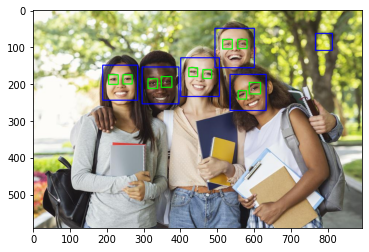

In [ ]:
#Solution here:
# Prepare the classifier.
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Prepare the images (need to be greyscaled) and detect faces
image_1 = cv2.imread('test_1.jpg')
grey = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
# Using the default values for the other params
faces = face_cascade.detectMultiScale(grey)
for (x, y, w, h) in faces:
    image_1 = cv2.rectangle(image_1, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Prepare regions for the detected faces
    roi_grey = grey[y:y+h, x:x+w]
    roi_colour = image_1[y:y+h, x:x+w]
    # Look for eyes within the detected faces (since only faces should have eyes)
    eyes = eye_cascade.detectMultiScale(roi_grey)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_colour, (ex, ey) ,(ex + ew, ey + eh), (0, 255, 0), 2)

"""Plot the detected faces and eyes
Plot seems to imply having axes present, but the tutorial linked doesn't
do that for this classifier. To have the axes one would need to use 
pyplot.imshow(img) followed by pyplot.show().
You'd also need to convert the colours back to normal first.

To the TA, if you don't want to see the axes, please uncomment the 
cv2_imshow(image_1) line and comment out the next three lines. You'll 
also need to do this for the next code block.
  
I just didn't know which was expected so I'm including both methods. 
"""
#cv2_imshow(image_1)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGRA2RGBA)
pyplot.imshow(image_1)
pyplot.show()

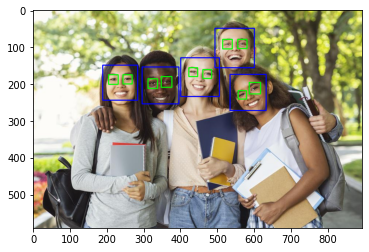

In [ ]:
# Parameter improvement 
# Prepare the images (need to be greyscaled) and detect faces
image_1 = cv2.imread('test_1.jpg')
grey = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
# Specify minSize to remove the false positive.
faces = face_cascade.detectMultiScale(grey, minSize=(50, 50))
for (x, y, w, h) in faces:
    image_1 = cv2.rectangle(image_1, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Prepare regions for the detected faces
    roi_grey = grey[y:y+h, x:x+w]
    roi_colour = image_1[y:y+h, x:x+w]
    # Look for eyes within the detected faces (since only faces should have eyes)
    eyes = eye_cascade.detectMultiScale(roi_grey)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_colour, (ex, ey) ,(ex + ew, ey + eh), (0, 255, 0), 2)

#cv2_imshow(image_1)
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGRA2RGBA)
pyplot.imshow(image_1)
pyplot.show()

*Discussion here:*

*Q2.2)*

Once again the detector performed very well. We still see that one false positive, but interestingly we don't see any eyes detected in that false positive region. I think difficulty is a bit of an ambiguous term. From the results the eye detecor performed better than the face detector because all of the eyes were correctly predicted with no false positives. That doesn't speak to the actual computational power required to make these predictions, and I don't think I would be qualified to speak on that if that is what was meant by difficulty (I'd imagine the eyes would be more difficult as it would need to keep track of the distance between the last eye and the next eye to ensure its in some acceptable range, but it is also working in a smaller area so maybe it is easier because there would be less calculations to perform. I'd need a better understanding of the code to accurately judge that). If difficulty refers to how well the detector worked, the results speak for themselves and I would say that face detection is actually the more difficult task because it produced a false positive while the eye detector makes use of the results of the face detector, reducing its search area and keeping things focused so it is more likely to yield desirable results (even not putting eyes in the false positive detected by the face detector, way to go eye dectector you are the bomb). 


---


*Q2.3)*

I'm pretty confused here, because all of the eyes are already successfully detected with default values (the values for `minNeighbors` and `scaleFactor` are not set, so they are using the default values of 3 and 1.1 respectively). I don't need to change the eye parameters since everything is detected correctly, but I could change the face detection parameters I suppose. We are detecting that false positive in the back, so a way to fix that would be to make use of the `minSize` parameter and set it sufficiently high such that the leaves are not detected. I found setting it to (50, 50) was enough to remove the false positive while ensuring all of the faces were still detected. This had no impact on the eye detection, as I didn't change the parameters for that at all and the areas being searched were identical, there was just one less area since the false postive wasn't included. 

</br>

I almost feel like the detector wasn't supposed to work this well? I am using the default values as specified in the question, but perhaps I was supposed to use the values from the linked tutorial of 1.3 and 5? But then again, those aren't the default values so who knows. If those were the values that I should of used I'd imagine they would have been listed in the question, but this is just my best assumption. 

# Part 2) Deep Learning - MTCNN
Multi-task Cascaded Convolutional Networks (MTCNN) is a framework developed as a solution for both face detection and face alignment. The process consists of three stages of convolutional networks that are able to recognize faces and landmark location such as eyes, nose, and mouth.
The [paper](https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf) proposes MTCNN as a way to integrate both tasks (recognition and alignment) using multi-task learning.


<img src="https://machinelearningmastery.com/wp-content/uploads/2019/03/Collage-Students-Photograph-with-Bounding-Boxes-and-Facial-Keypoints-Drawn-For-Each-Detected-Face-using-MTCNN.png" width="500">

[Source](https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/)

## Q3) MTCNN Architecture (1)

Skim the MTCNN paper. Name and describe the three stages of MTCNN, provide the equation (latex format) for the loss function of each task and state the type of problem (i.e. regression or classification) for each loss function. Provide your answer in the cell below.

*Discussion here:*

Stages:
1. P-Net (Proposal Network)
  - Determines all possible candidates and their bounding box regressions using a fully convulutional network. We essentially look at an image and find all possible locations for a face and draw candidate for each identified candidate location. We use the bounding boxes regression vectors (identified alongside the candidate windows) for calibration of the candidates before moving on to using non-maximum suppression to merge many overlapping candidates so the image so the bounding boxes are less noisy on the image.
2. R-Net  (Refine Network)
  - We use another convulutional network that aims to reject as many false positive candidates as possible. Then once again calibration is done using bounding box regression vectors and we merge overlapping candidates using non-maximum suppression.
3. O-Net (Output Network)
  - Largely similar to the R-Net step described above, but this time the O-Net will output five facial landmarks' and their position on the image. So in essense, the O-Net will attempt to provide more detail to the face. 

Loss functions:
1. Face classification: Cross-entropy loss (classification)

$$ L_{i}^{det} = -(y_{i}^{det}\text{log}(p_{i}) + (1-y_{i}^{det})(1-\text{log}(p_{i}))) $$

2. Bounding box regression: Euclidean loss (regression)

$$ L_{i}^{box}=\left\|\hat{y}_{i}^{box}-y_{i}^{box}\right\|_{2}^{2} $$

3. Facial landmark localization: Euclidean loss (regression)

$$ L_{i}^{landmark}=\left\|\hat{y}_{i}^{landmark}-y_{i}^{landmark}\right\|_{2}^{2} $$


## Q4) MTCNN on Test Images (3)

Apply MTCNN on the test images from Part 1. Overlay the bounding boxes and the landmarks on each image and plot the results. That is, each image should be displayed with each face bounding box and corresponding landmarks added to the image (similar to the one shown in the Part 2 introduction). Compare these results to those from *Q1)* and discuss.

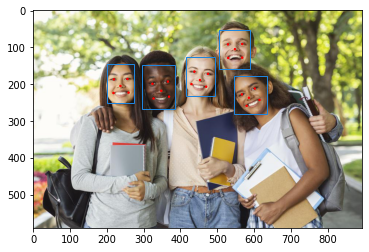

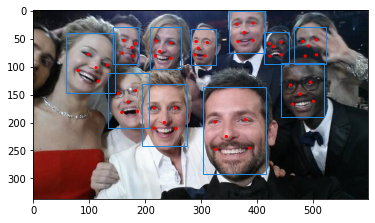

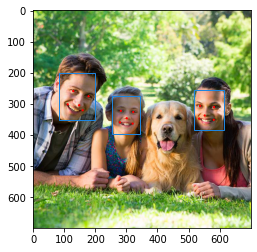

In [ ]:
#Load MTCNN network
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

#Solution here:
 
# Shamelessly stolen from the link for the source of the image in Part 2)
# i.e.: https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/
# Oh no I broke PEP 8 with that link reference. Anyways:
def draw_image_with_boxes_and_features(mtcnn_image, mtcnn_faces):
	# Load and plot the image
	pyplot.imshow(pyplot.imread(mtcnn_image))
	# Get the context for the boundary boxes
	ax = pyplot.gca()
	for face in mtcnn_faces:
		# Get the coordinates for the boundary box
		x, y, width, height = face['box']
		# Create and draw the box (make it blue)
		ax.add_patch(Rectangle((x, y), width, height, fill=False, color='#1F85DE'))
		for key, value in face['keypoints'].items():
			# create and draw the facial landmarks (dots) (make them red)
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# Display the plot with the boundary boxes and facial landmarks
	pyplot.show()


# Prepare the files and detector with default values
files = ['test_1.jpg', 'test_2.jpg', 'test_3.jpg']
detector = MTCNN()

# Detect and display the faces (with features) on the image
for curr_file in files:
	pixels = pyplot.imread(curr_file)
	faces = detector.detect_faces(pixels)
	draw_image_with_boxes_and_features(curr_file, faces)


*Discussion here:*

It should be plainly obvious from the results that the MTCNN performed significantly better with default weights compared to the feature-based cascade classifier with default parameters. Really on every single image the difference is clear, there are no false positives when using the MTCNN for any image where there were false positives for the first and third test image using the feature-based cascade classifier. The MTCNN picks up every face present in the image save for the very cut off face to the left of image 2, while the feature-based cascade classifier misses three faces in image 2 (four including the partial face on the left that the MTCNN also missed). Lastly, the MTCNN doesn't have overlapping boxes that can be seen on image 3 for the feature-based cascade classifier. All of this makes sense given the three stages of MTCNN and how it goes about calibration and non-maximum suppression. The false positive reduction stage especially seems to have made a big difference here as mentioned previously since we don't see any false positives at all. Overall this the MTCNN is clearly better for the task of facial classification assuming we use the default values and don't play around with any parameters. However even playing around with the parameters the MTCNN was able to produce better results than I could by manually tweaking the parameters for image 2 in Q1.2).

## CelebA Dataset
To quantitatively test the performance of the face detections, we need an annotated dataset. We will use the CelebA dataset. 

CelebFaces Attributes Dataset ([CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)) is a large-scale face attributes dataset with more than 200K celebrity images. The images in this dataset cover large pose variations and background clutter. It contains annotations for face bounding boxes and 5 landmarks:
1. left_eye
2. right_eye
3. nose
4. mouth_left
5. mouth_right

A subset of these images and their annotations are provided in a zip file on google drive. Run the cell below to download and load the data into the workspace.

You can access the image data by: `imgs[#]`

You can access the image filename by: `imgs.files[#].split('/')[-1]`

You can access elements of annoation dataframe in 3 ways:
 1. `anno.loc[image_id,column_name]`
 2. `anno.iloc[row_#,column_#]`
 3. `anno[column_name][row_#/image_id]`



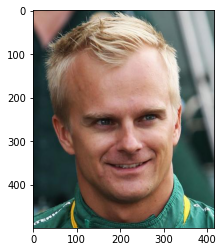

000013.jpg
left-eye coordinates: (165,255)
upper left point of bbox: (89,132)


In [ ]:
import io
from googleapiclient.http import MediaIoBaseDownload
from zipfile import ZipFile
import skimage.io 
import matplotlib.pyplot as plt
import pandas as pd

#Download  file
file_id = "1Nt9uUZgssHUlwHbe9LFVZ0hhgaIQmcj-"
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  _, done = downloader.next_chunk()
#Extract zip file
with ZipFile(downloaded) as zipf:
    zipf.extractall()

#Load images
imgs = skimage.io.collection.ImageCollection('celeb_a_mini/imgs/*.jpg')
#Load bounding box
df = pd.read_csv('celeb_a_mini/list_bbox_celeba.txt',delim_whitespace=True,header=1).set_index('image_id')
bbox = df.loc[[f.split('/')[-1] for f in imgs.files]].copy()
#Load landmarks
df = pd.read_csv('celeb_a_mini/list_landmarks_celeba.txt',delim_whitespace=True,header=1)
landmarks = df.loc[[f.split('/')[-1] for f in imgs.files]].copy()
#Combine annotations
anno = pd.concat([bbox,landmarks],axis=1)

#Plot example image
plt.imshow(imgs[10]) #access image data by accessing the array (i.e. imgs[#])
plt.show()
#Print locations of landmarks
print(imgs.files[10].split('/')[-1])
print('left-eye coordinates: ({},{})'.format(anno['lefteye_x'][10],anno['lefteye_y'][10]))
print('upper left point of bbox: ({},{})'.format(anno['x_1'][10],anno['y_1'][10]))

In [ ]:
#Display dataframe which contains ground truth annotations
anno.head()

,x_1,y_1,width,height,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
image_id,,,,,,,,,,,,,,
000001.jpg,95,71,226,313,165,184,244,176,196,249,194,271,266,260
000002.jpg,72,94,221,306,140,204,220,204,168,254,146,289,226,289
000003.jpg,216,59,91,126,244,104,264,105,263,121,235,134,251,140
000005.jpg,236,109,120,166,273,169,328,161,298,172,283,208,323,207
000006.jpg,146,67,182,252,202,158,259,165,234,196,197,228,243,233


## Intersection over Union
One metric to evaluate the accuracy of our face detection is Intersection over Union (IoU). IoU is an evaluation metric used to measure the accuracy of an object detector on a particular dataset. More formally, in order to apply IoU to evaluate an object detector we need:
* The ground-truth bounding boxes
* The predicted bounding boxes from our model.

To calculate IoU we use: 

<img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png)" width="500">

[Source](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)


## Q5) Evaluate Performance using IoU (5)

Calculate the average IoU across all detections over the CelebA dataset using MTCNN and the Cascaded Classifier ("haarcascade_frontalface_default.xml"). Compare the performance of the methods. Show an example of an image with misclassification (IoU < 0.5) for both methods. 

Example image where IoU is worse than 0.5 for MTCNN and the Cascade Classifier:
Calculated IoU for MTCNN was 0.4764531247645312
Calculated IoU for the Cascade Classifer was 0.0


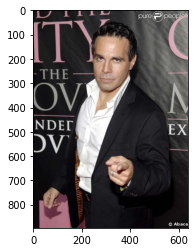


Average IoU for MTCNN is 0.5777854051695509
Average IoU for the Cascade Classifier is 0.42935553645939395


In [ ]:
#Solution here:

# Adapted from https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
# Oh no another PEP 8 violation
def bb_intersection_over_union(truth_box, pred_box, index):
  # Get the coordinates for the boxes
  x, y, w, h = pred_box
  tx = truth_box['x_1'][index]
  ty = truth_box['y_1'][index]
  tw = truth_box['width'][index]
  th = truth_box['height'][index]
  x_a = max(tx, x)
  y_a = max(ty, y)
  x_b = min(tx + tw, x + w)
  y_b = min(ty + th, y + h)
  # Calculate intersecting area
  inter_area = max(0, x_b - x_a + 1) * max(0, y_b - y_a + 1)
  # Calculate areas for ground-truth and predicted boxes
  truth_box_area = (tw + 1) * (th + 1)
  pred_box_area = (w + 1) * (h + 1)
  # Calculate the IoU by taking the intersection area and 
  # dividing it by ground-truth + prediction areas - the interesection area
  iou = inter_area / float(truth_box_area + pred_box_area - inter_area)
  return iou


# Run both at once
iou_average_mtcnn = 0
iou_average_cc = 0
# The question says the average over all detections, and we may detect multiple
# (or none) per image, so we need to keep track of how many we look at
detections_mtcnn = 0
detections_cc = 0
# Used to display a single example image with IoU < 0.5 for both methods
sample_image = True

for index, curr_celeb in enumerate(imgs):
  # MTCNN
  # We do this to avoid displaying an image if no detections have been found
  temp_iou_mtcnn
  face = detector.detect_faces(curr_celeb)
  # Calculate IoU for each detection (in case there are multiple)
  for detection_mtcnn in face:
    predicted_box_mtcnn = detection_mtcnn['box']
    temp_iou_mtcnn = bb_intersection_over_union(anno, predicted_box_mtcnn, index)
    iou_average_mtcnn += temp_iou_mtcnn
    detections_mtcnn += 1

  # Cascade Classifier
  # We do this to avoid displaying an image if no detections have been found
  temp_iou_cc = 1
  grey = cv2.cvtColor(curr_celeb, cv2.COLOR_BGR2GRAY)
  predicted_box_cc = face_cascade.detectMultiScale(grey)
  # Calculate IoU for each detection (in case there are multiple)
  for detection_cc in predicted_box_cc:
    x, y, w, h = detection_cc
    detection_cc = [x, y, w, h]
    temp_iou_cc = bb_intersection_over_union(anno, detection_cc, index)
    iou_average_cc += temp_iou_cc
    detections_cc += 1

  # Sample image display where IoU < 0.5 for both method
  # Note the question didn't say to display the bounding boxes so I'm not
  # doing that here.
  if sample_image and temp_iou_mtcnn < 0.5 and temp_iou_cc < 0.5:
    # We don't want to display another example.
    sample_image = False
    print('Example image where IoU is worse than 0.5 for MTCNN and the Cascade Classifier:')
    print('Calculated IoU for MTCNN was {}'.format(temp_iou_mtcnn))
    print('Calculated IoU for the Cascade Classifer was {}'.format(
        temp_iou_cc))
    plt.imshow(imgs[index])
    plt.show()

# Display averagee IoU for both methods
print('\nAverage IoU for MTCNN is {}'.format(iou_average_mtcnn / 
                                           detections_mtcnn))
print('Average IoU for the Cascade Classifier is {}'.format(
    iou_average_cc / detections_cc))


*Discussion here:*

Once again the ouput above speaks for itself. The MTCNN performed better (had a higher IoU average) compared to the Cascade Classifier. This higher average means that the predicted bounding boxes were closer to the ground-truth bounding boxes for MTCNN compared to the Cascade Classifier. This matches what was observed and noted in the previous questions explored during this assignment. I do believe the non-maximum suppression done in each stage of the MTCNN is very helpful with increasing the overall effectiveness of the MTCNN compared to the Cascade Classifier. 

## Bonus: Mean % Error Landmarks (1)
For the correct detections from MTCNN, calculate the average euclidian distance between the predicted landmark with the ground truth landmarks for all landmarks; normalize these values with respect to the inter-ocular distance (ground-truth distance between left and right eyes). Compare the accuracy across the five landmarks.

In [ ]:
#Solution here:
# I'm sorry, but I need to get back to playing Animal Crossing: New Leaf
# for the Nintendo 3DS. Goodbye.